<a href="https://colab.research.google.com/github/domysolano/Dataset-Analysis-Using-Matplotlib/blob/main/DatasetAnalysisUsingMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Inteligencia Artificial y Analítica de Datos**

Curso: *Programación para Analítica Descriptiva y Predictiva*.

* Semestre: Enero-Junio 2026.
* Profesor: Dr. Vicente García Jiménez.
* Alumno: Ricardo Solano Monje.
* Matrícula: 266221.
* Unidad 1.
* Práctica 7: Análisis de un Dataset con Matplotlib.
* Objetivo de la práctica: Utilizar matplotlib para analizar e interpretar visualmente datos cargados desde un dataset.
* Realizado por: Ricardo Solano Monje.

# Carga y exploración del dataset:

Cargar el dataset Iris utilizando seaborn o cualquier otro dataset de su elección.
Verificar las primeras filas del dataset con el método .head().
Obtener información general sobre los datos (nombres de columnas, tipos de datos, valores nulos, etc.).

In [33]:
# placing code into functions, so as to put code into different cells as requested by professor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_and_explore_iris():
    """
    Loads the Iris dataset and performs basic exploration.

    Returns:
        pandas.DataFrame: The loaded Iris dataset
    """
    print(" LOADING AND EXPLORING IRIS DATASET")
    print("=" * 60)

    # Load the dataset from seaborn
    iris = sns.load_dataset('iris')

    # Basic dataset information
    print("\n First 5 rows of the dataset:")
    print(iris.head())

    print("\n" + "=" * 60)
    print("\n Dataset Information:")
    print(f"Shape: {iris.shape} (rows, columns)")
    print(f"Number of species: {iris['species'].nunique()}")
    print(f"Species: {list(iris['species'].unique())}")

    print("\n Column names and data types:")
    for col in iris.columns:
        print(f"  - {col}: {iris[col].dtype}")

    print("\n Missing values:")
    missing_values = iris.isnull().sum()
    if missing_values.sum() == 0:
        print("  No missing values found ")
    else:
        print(missing_values[missing_values > 0])

    print("\n" + "=" * 60)
    print("\n Basic statistics:")
    print(iris.describe().round(2))

    return iris
def main():
    """
    Main function to orchestrate the data loading, analysis, and visualization.
    """
    print(" IRIS DATASET ANALYSIS WITH MATPLOTLIB")
    print("=" * 60)

    try:
        # Step 1: Load and explore data, no path needed because it is load using seaborn
        iris_data = load_and_explore_iris()

    except Exception as e:
        print(f"\n An error occurred: {e}")
        print("Please check your installation of seaborn and matplotlib.")


  # This ensures the main() function only runs when the script is executed directly
if __name__ == "__main__":
  main()

 IRIS DATASET ANALYSIS WITH MATPLOTLIB
 LOADING AND EXPLORING IRIS DATASET

 First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


 Dataset Information:
Shape: (150, 5) (rows, columns)
Number of species: 3
Species: ['setosa', 'versicolor', 'virginica']

 Column names and data types:
  - sepal_length: float64
  - sepal_width: float64
  - petal_length: float64
  - petal_width: float64
  - species: object

 Missing values:
  No missing values found 


 Basic statistics:
       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76 

# Crear los siguientes gráficos con Matplotlib:

## a) Gráfico de barras:

Objetivo: Comparar el promedio de largo y ancho de los pétalos entre las tres especies de Iris.

**Instrucciones:** Utiliza un gráfico de barras para mostrar la media de las columnas petal_length y petal_width agrupadas por species.


 AVERAGE PETAL DIMENSIONS BY SPECIES:
            petal_length  petal_width
species                              
setosa              1.46         0.25
versicolor          4.26         1.33
virginica           5.55         2.03

 CREATING VISUALIZATION


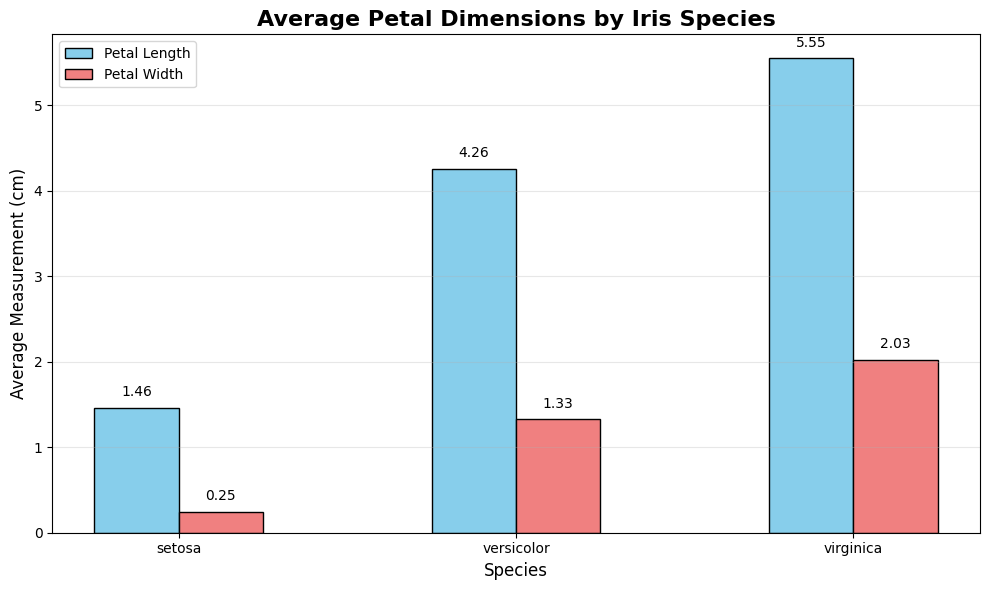

In [34]:
# placing code into functions, so as to put code into different cells as requested by professor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


def load_and_explore_iris():
    """
    Loads the Iris dataset and performs basic exploration.

    Returns:
        pandas.DataFrame: The loaded Iris dataset
    """
    # Load the dataset from seaborn
    iris_df = sns.load_dataset('iris')
    return iris_df


def calculate_species_averages(iris_df):
    """
    Calculates average petal dimensions for each species.

    Args:
        iris_df (pandas.DataFrame): The Iris dataset

    Returns:
        pandas.DataFrame: Averages by species
    """
    speciesMeans = iris_df.groupby('species')[['petal_length', 'petal_width']].mean()

    print("\n" + "=" * 60)
    print(" AVERAGE PETAL DIMENSIONS BY SPECIES:")
    print("=" * 60)
    print(speciesMeans.round(2))

    return speciesMeans


def create_petal_comparison_chart(speciesMeans, bar_width=0.25, figsize=(10, 6)):
    """
    Creates a bar chart comparing average petal length and width by species.

    Args:
        species_means (pandas.DataFrame): Average dimensions by species
        bar_width (float): Width of individual bars
        figsize (tuple): Figure dimensions (width, height)
    """
    print("\n" + "=" * 60)
    print(" CREATING VISUALIZATION")
    print("=" * 60)
    # Create the bar chart
    plt.figure(figsize=figsize)

    # Set width for bars
    bar_width = bar_width
    #x_pos = np.arange(len(species_means.index))
    # Calculate x positions for bars
    nSpecies = len(speciesMeans)
    x_pos = np.arange(nSpecies)

    # Create bars
    plt.bar(x_pos - bar_width/2, speciesMeans['petal_length'],
        width=bar_width, label='Petal Length', color='skyblue', edgecolor='black')
    plt.bar(x_pos + bar_width/2, speciesMeans['petal_width'],
        width=bar_width, label='Petal Width', color='lightcoral', edgecolor='black')

    # Customize the chart
    plt.title('Average Petal Dimensions by Iris Species', fontsize=16, fontweight='bold')
    plt.xlabel('Species', fontsize=12)
    plt.ylabel('Average Measurement (cm)', fontsize=12)
    plt.xticks(x_pos, speciesMeans.index)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, (length, width) in enumerate(zip(speciesMeans['petal_length'], speciesMeans['petal_width'])):
        plt.text(i - bar_width/2, length + 0.1, f'{length:.2f}', ha='center', va='bottom', fontsize=10)
        plt.text(i + bar_width/2, width + 0.1, f'{width:.2f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()





def main():
    """
    Main function to orchestrate the data loading, analysis, and visualization.
    """
   # print(" IRIS DATASET ANALYSIS WITH MATPLOTLIB")
   # print("=" * 60)

    try:
        # Step 1: Load and explore data, no path needed because it is load using seaborn
        irisData = load_and_explore_iris()

        # Step 2: Calculate averages
        species_averages = calculate_species_averages(irisData)

        # Step 3: Create visualizations
        create_petal_comparison_chart(species_averages, bar_width=0.25, figsize=(10, 6))

    except Exception as e:
        print(f"\n An error occurred: {e}")
        print("Please check your installation of seaborn and matplotlib.")


# This ensures the main() function only runs when the script is executed directly
if __name__ == "__main__":
    main()

# b) Histograma:

**Objetivo:** Visualizar la distribución de la longitud de los sépalos (sepal_length).

**Instrucciones:** Crea un histograma de la variable sepal_length y asegúrate de que tenga un número adecuado de bins. Coloca etiquetas en los ejes y un título.

 IRIS DATASET: SEPAL LENGTH DISTRIBUTION ANALYSIS
 Dataset loaded Shape: (150, 5)

  Dataset preview:

   sepal_length species
0           5.1  setosa
1           4.9  setosa
2           4.7  setosa
3           4.6  setosa
4           5.0  setosa

  CREATING MAIN HISTOGRAM
 Calculated optimal bins using auto-bins rule: 9 bins



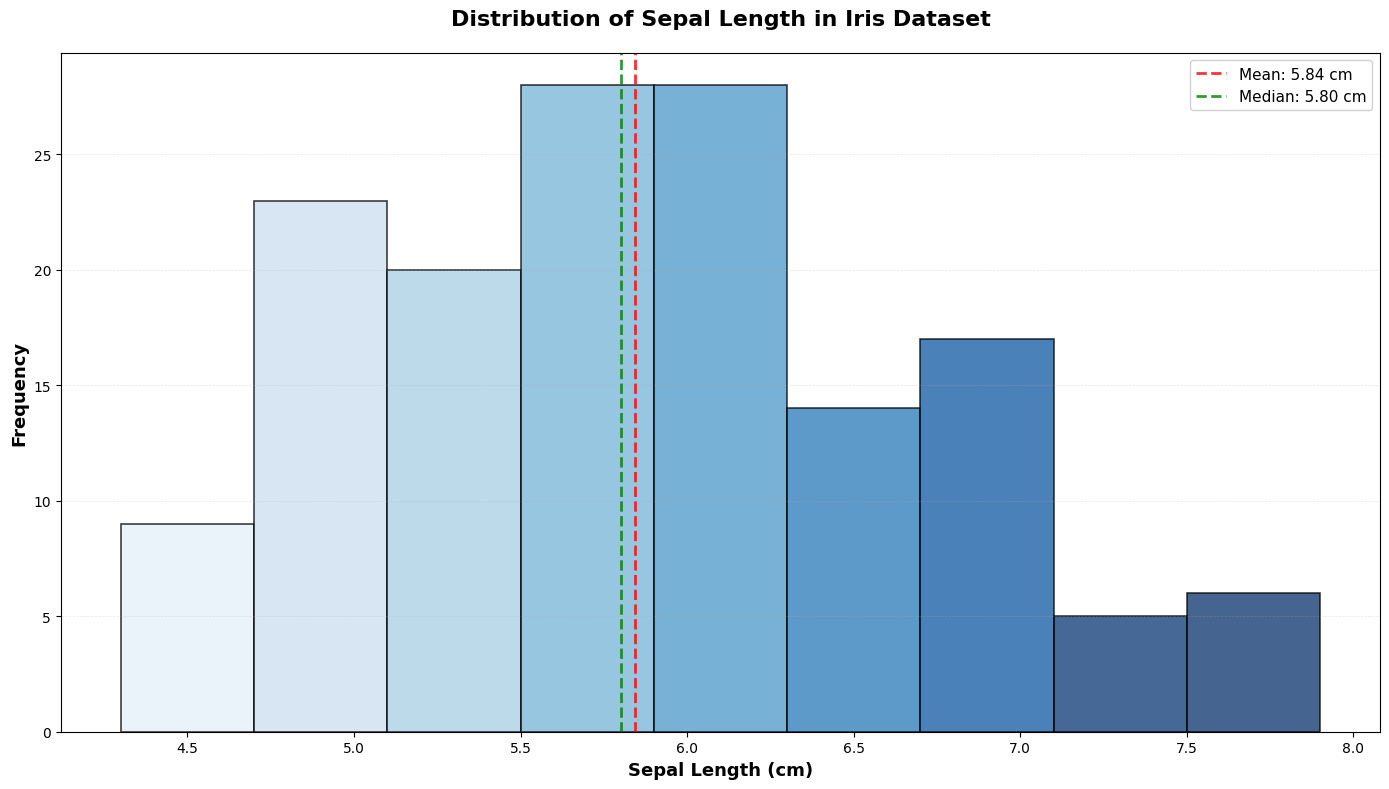

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from typing import Tuple

"""
The arrow (->) in a Python function definition, as in def load_iris_data() ->,
is used for a function annotation, specifically to indicate the return type of the function.
It is part of a syntax introduced in Python 3 for type hinting.
"""
def load_iris_data() -> pd.DataFrame:
    """
    Loads the Iris dataset from seaborn.

    Returns:
        pandas.DataFrame: The Iris dataset
    """
    iris_df = sns.load_dataset('iris')
    print(f" Dataset loaded Shape: {iris_df.shape}")
    return iris_df


def calculate_bins(data: pd.Series, method: str = 'auto-bins') -> int:
    """
    Calculates appropriate number of bins for a histogram.

    Args:
        data: Data series for which bins are calculated
        method: just two methods included: Method to calculate bins ('auto-bins', 'sqrt')

    Returns:
        int: Recommended number of bins
    """
    n = len(data)

    if method == 'auto-bins':
        # Default Matplotlib method
        #print("using auto-bins") line for testing
        return int(np.ceil(np.log2(n)) + 1)
    elif method == 'sqrt':
        # Square root rule
        return int(np.ceil(np.sqrt(n)))
    else:
        return 10  #  10 bins by default


def create_sepal_length_histogram(
    iris_df: pd.DataFrame,
    bins: int = None,
    color: str = 'steelblue',
    edgecolor: str = 'black',
    figsize: Tuple[int, int] = (12, 7)
) -> plt.Figure:
    """
    Creates a histogram of sepal length from the Iris dataset.

    Args:
        iris_df: Iris dataset
        bins: Number of bins for histogram (if None, calculates automatically)
        color: Color of histogram bars
        edgecolor: Color of bar edges
        figsize: Figure size (width, height)

    Returns:
        matplotlib.figure.Figure: The created figure
    """

    # Extract sepal length data and clean na values making a copy
    #sepal_length =iris_df(['sepal_length']) #uncomment this line if you know for sure there are not na values
    sepal_length_series = iris_df['sepal_length']
    sepal_length_series_with_na = sepal_length_series.copy()
    sepal_length = sepal_length_series_with_na.dropna()

    # Calculate bins if not provided using auto bins by default, it has been included just two methods
    if bins is None:
        method='auto-bins'
        bins = calculate_bins(sepal_length, method=method)
        print(f" Calculated optimal bins using {method} rule: {bins} bins\n")

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Create histogram
    n, bins, patches = ax.hist(
        sepal_length,
        bins=bins,
        color=color,
        edgecolor=edgecolor,
        alpha=0.75,
        linewidth=1.2
    )

    # Customize colors (gradient effect)
    cmap = plt.cm.Blues
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cmap(c + 0.1))

    # Add title and labels
    ax.set_title(
        'Distribution of Sepal Length in Iris Dataset',
        fontsize=16,
        fontweight='bold',
        pad=20
    )
    #x label
    ax.set_xlabel(
        'Sepal Length (cm)',
        fontsize=13,
        fontweight='semibold'
    )
    # y label
    ax.set_ylabel(
        'Frequency',
        fontsize=13,
        fontweight='semibold'
    )
    # Add grid for better readability, it is a light version
    ax.grid(
        axis='y',
        alpha=0.3,
        linestyle='--',
        linewidth=0.5
    )

    # Add mean and median lines
    mean_val = sepal_length.mean()
    median_val = sepal_length.median()
    # dotted mean vertical line in red color
    ax.axvline(
        mean_val,
        color='red',
        linestyle='--',
        linewidth=2,
        alpha=0.8,
        label=f'Mean: {mean_val:.2f} cm'
    )
    # dotted median vertical line in green color
    ax.axvline(
        median_val,
        color='green',
        linestyle='--',
        linewidth=2,
        alpha=0.8,
        label=f'Median: {median_val:.2f} cm'
    )




    # Add legend on the right upper corner
    ax.legend(loc='upper right', fontsize=11, framealpha=0.9)

    # Adjust layout
    plt.tight_layout()

    return fig




def main():
    """
    Main function to run the complete analysis.
    """
    print("=" * 60)
    print(" IRIS DATASET: SEPAL LENGTH DISTRIBUTION ANALYSIS")
    print("=" * 60)

    try:
        # Step 1: Load data
        iris_data = load_iris_data()

        # Quick preview
        print(f"\n  Dataset preview:\n")
        print(iris_data[['sepal_length', 'species']].head())



        # Step 2: Create main histogram
        print("\n" + "=" * 60)
        print("  CREATING MAIN HISTOGRAM")
        print("=" * 60)

        fig = create_sepal_length_histogram(
            iris_data,
            bins=None,  # Let the function calculate optimal bins
            color='steelblue',
            edgecolor='black',
            figsize=(14, 8)
        )

        plt.show()





    except Exception as e:
        print(f"\n Error occurred: {e}")
        import traceback
        traceback.print_exc()


# Run the program
if __name__ == "__main__":
    main()

# c) Gráfico de dispersión (scatter plot):

Objetivo: Relacionar el largo del pétalo con el ancho del pétalo.

Instrucciones: Crea un gráfico de dispersión que compare petal_length con petal_width. Usa un color diferente para cada especie.

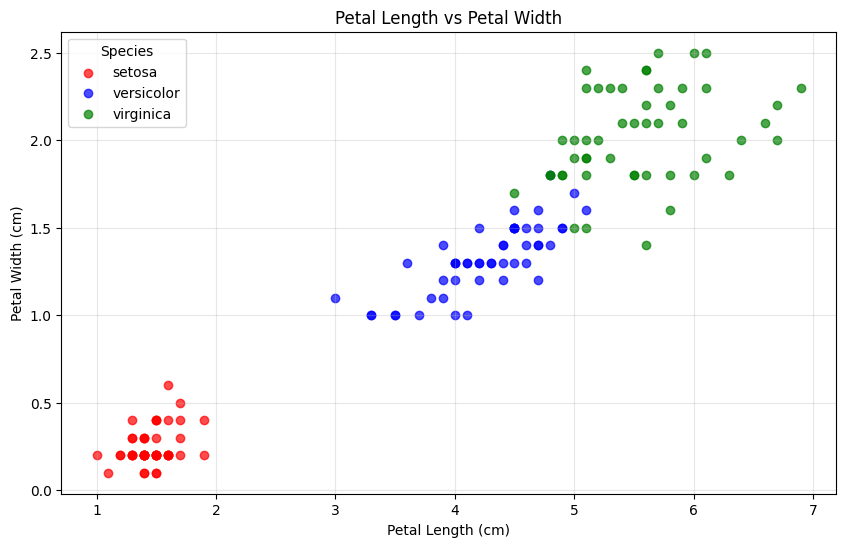

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
iris = sns.load_dataset('iris')

# Create scatter plot
plt.figure(figsize=(10, 6))

# Color each species differently
# THE MAGIC OF ZIP, IT PAIRS ['setosa', 'versicolor', 'virginica'] WITH ['red', 'blue', 'green']
# # zip creates pairs:
# ('setosa', 'red')
# ('versicolor', 'blue')
# ('virginica', 'green')
# then the loop will give us:
# First iteration: species='setosa', color='red'
# Second iteration: species='versicolor', color='blue'
# Third iteration: species='virginica', color='green'

for species, color in zip(iris['species'].unique(), ['red', 'blue', 'green']):
    data = iris[iris['species'] == species]
    plt.scatter(data['petal_length'], data['petal_width'],
                color=color, label=species, alpha=0.7)

# Add labels and title
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True, alpha=0.3)

plt.show()

# d) Gráfico de cajas (box plot):

**Objetivo:** Analizar la distribución de las medidas del sépalo (sepal_length, sepal_width).

**Instrucciones:** Crea un gráfico de cajas para mostrar la distribución de las variables sepal_length y sepal_width por especie.

### d-1) Using DataFrame.boxplot() (Pandas):

*Pandas DataFrames have a built-in boxplot() method.*

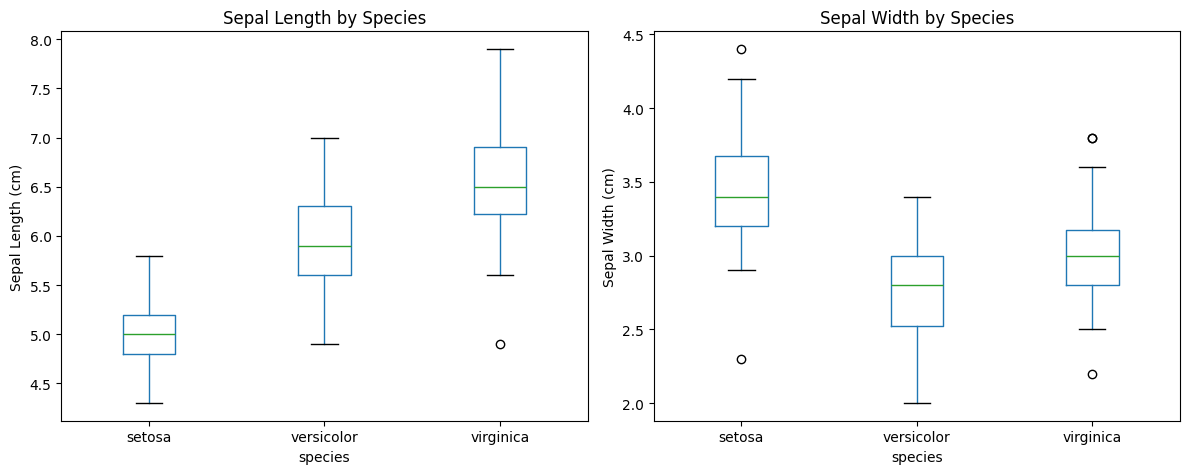

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    """Load the Iris dataset."""
    return sns.load_dataset('iris')

def create_box_plot(iris_df):
    """Create box plots for sepal measurements by species."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Box plot for sepal length
    iris_df.boxplot(column='sepal_length', by='species', ax=ax1)

    ax1.set_title('Sepal Length by Species')
    ax1.set_ylabel('Sepal Length (cm)')
    ax1.grid(False) #no grid for cleaner visualization
    # Box plot for sepal width
    iris_df.boxplot(column='sepal_width', by='species', ax=ax2)
    ax2.set_title('Sepal Width by Species')
    ax2.set_ylabel('Sepal Width (cm)')

    plt.suptitle('')
    plt.tight_layout()
    ax2.grid(False) #no grid for cleaner visualization
    plt.show()

def main():
    """Main function."""
    iris = load_data()
    create_box_plot(iris)

if __name__ == "__main__":
    main()

### d-2) Using plt.boxplot() (Matplotlib):

*Data needs to be prapared manually*

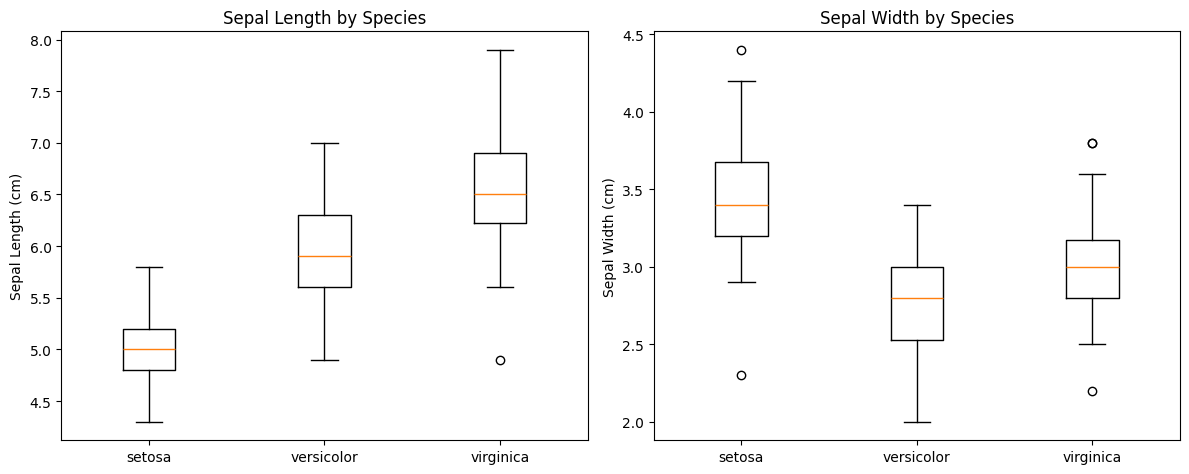

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_data():
    """Load the Iris dataset."""
    return sns.load_dataset('iris')

def create_box_plot(iris_df):
    """Create box plots for sepal measurements by species."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Box plot for sepal length


    # Preparing data...
    setosa = iris[iris['species'] == 'setosa']['sepal_length']
    versicolor = iris[iris['species'] == 'versicolor']['sepal_length']
    virginica = iris[iris['species'] == 'virginica']['sepal_length']

    ax1.boxplot([setosa, versicolor, virginica])
    ax1.set_xticks([1, 2, 3], ['setosa', 'versicolor', 'virginica'])
    #plt.show()

    ax1.set_title('Sepal Length by Species')
    ax1.set_ylabel('Sepal Length (cm)')
    ax1.grid(False) #no grid for cleaner visualization

    # Box plot for sepal width
    # Preparing data...
    setosa = iris[iris['species'] == 'setosa']['sepal_width']
    versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
    virginica = iris[iris['species'] == 'virginica']['sepal_width']

    ax2.boxplot([setosa, versicolor, virginica])
    ax2.set_xticks([1, 2, 3], ['setosa', 'versicolor', 'virginica'])

    ax2.set_title('Sepal Width by Species')
    ax2.set_ylabel('Sepal Width (cm)')

    plt.suptitle('')
    plt.tight_layout()
    ax2.grid(False) #no grid for cleaner visualization
    plt.show()

def main():
    """Main function."""
    iris = load_data()
    create_box_plot(iris)

if __name__ == "__main__":
    main()

# e) Gráfico de líneas:

**Objetivo:** Mostrar la tendencia de la longitud del pétalo (petal_length) a través de las observaciones.

**Instrucciones:** Crea un gráfico de líneas utilizando la variable petal_length (en el eje Y) con el índice de las observaciones (en el eje X). Puedes hacer esto para ver cómo varía la longitud del pétalo a lo largo del dataset.

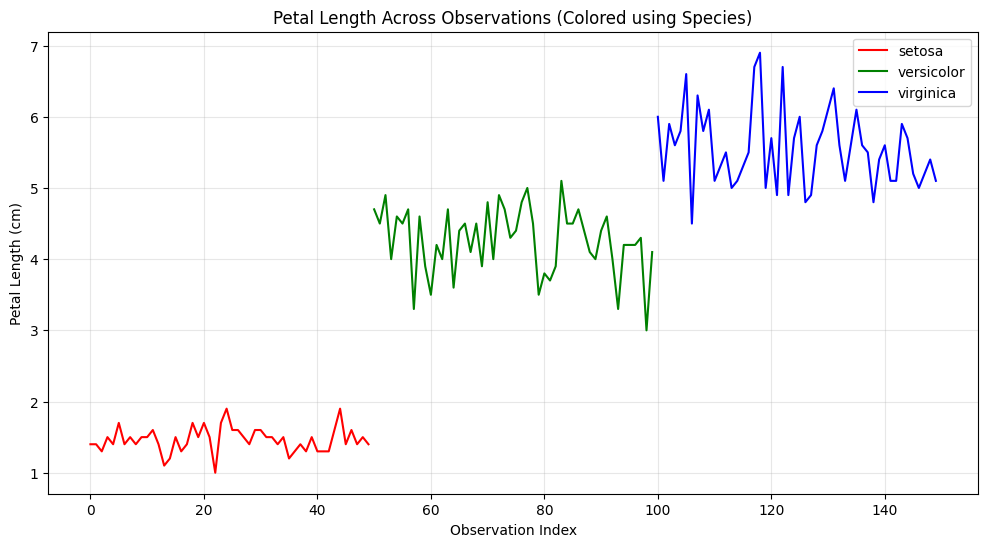

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

plt.figure(figsize=(12, 6))

# Get colors using species
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for species, color in colors.items():
    species_data = iris[iris['species'] == species]
    plt.plot(species_data.index, species_data['petal_length'],
             color=color, linewidth=1.5, label=species)

plt.title('Petal Length Across Observations (Colored using Species)')
plt.xlabel('Observation Index')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### Same functionality using modular functions

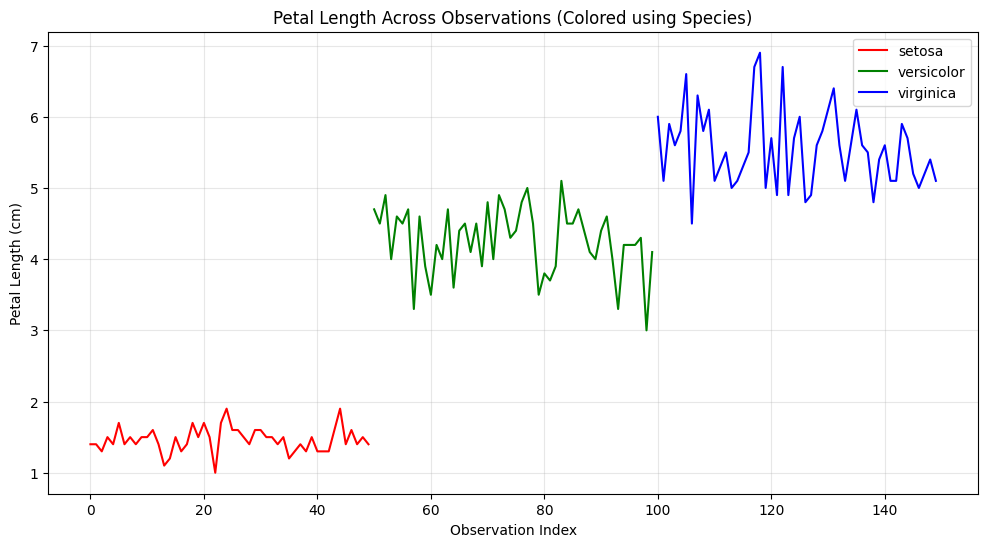

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    """Load the Iris dataset."""
    return sns.load_dataset('iris')

def create_line_graph(iris_df):
    """Create a line graph of petal length across observations."""
    plt.figure(figsize=(12, 6))

    # get colors using species
    colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

    for species, color in colors.items():
        species_data = iris_df[iris_df['species'] == species]
        plt.plot(species_data.index, species_data['petal_length'],
             color=color, linewidth=1.5, label=species)

    plt.title('Petal Length Across Observations (Colored using Species)')
    plt.xlabel('Observation Index')
    plt.ylabel('Petal Length (cm)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.show()

def main():
    """Main function."""
    iris_df = load_data()
    create_line_graph(iris_df)

if __name__ == "__main__":
    main()